### 1) Importing Libraries/ Dependancies - 

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2) Data Gathering and Data Validitation -

In [2]:
# Reading CSV File -
df_teleco = pd.read_csv("Telco-Customer-Churn.csv")
df_teleco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the first 5 records of the data. Check the various attributes of data like shape (rows and cols), Columns, datatypes.

### 3) EDA (Exploratory Data Analysis) -

Steps Involved in EDA - 
    1) Information about Datset
    2) Describe Dataset
    3) Find Missing Values / Percentage of Missing Values
    4) Value Counts of Each Object Feature
    4) Desciding Encoding Types
    5) Outliers Detection
    6) Correlation with Target Feature
    7) VIF (Variance Inflation Factor)
    8) Status of Target Feature
    9) Univariate analysis

#### Information about Datset

In [3]:
# Checking Shape of Data 
df_teleco.shape

(7043, 21)

There are 7043 rows and 21 features are in data.

In [4]:
# checking for all the column names 
df_teleco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df_teleco.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Describe Dataset

In [6]:
# Check the descriptive statistics of numeric variables
df_teleco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check the descriptive statistics of categorical variables
df_teleco.describe(exclude="number").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Here we have got basic information about data like non null count, memory usage and Data type of Features. According to buisness Total charges must be Numerical one so there are 11 count of null values.

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

#### Find Missing Values / Percentage of Missing Values

In [8]:
# Count of Missing Values in Each Feature 
df_teleco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

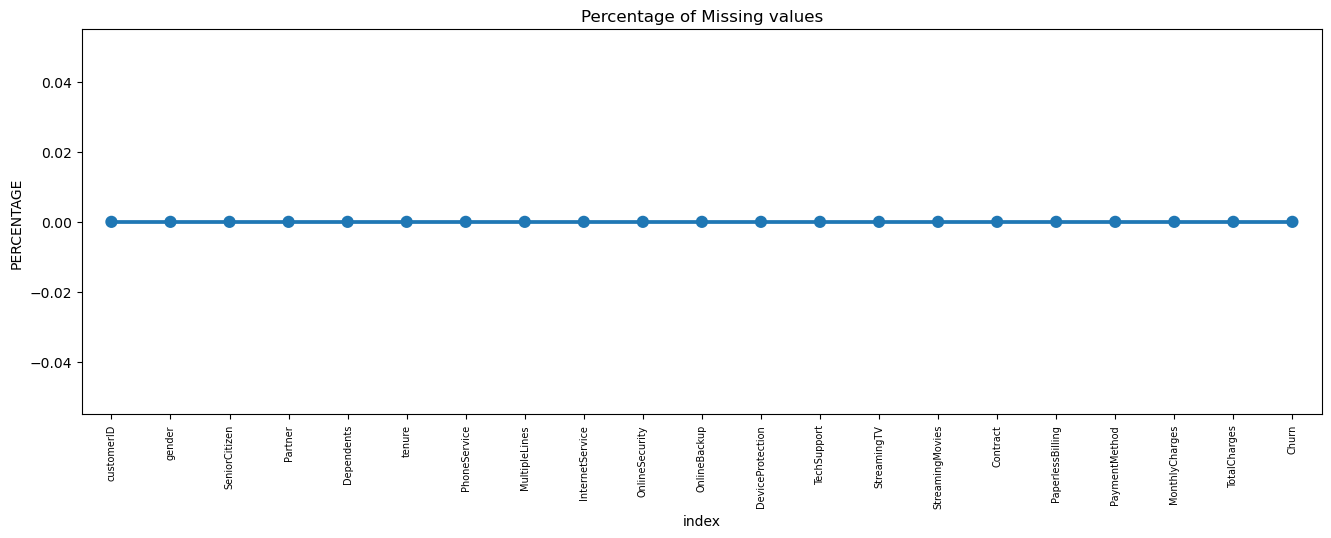

In [9]:
missing = pd.DataFrame((df_teleco.isnull().sum())*100/df_teleco.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

Total Charges should be numeric amount. Let's convert it to numerical data type

In [10]:
df_teleco.TotalCharges = pd.to_numeric(df_teleco.TotalCharges, errors='coerce')
df_teleco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [11]:
df_teleco.loc[df_teleco["TotalCharges"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Creating Copy of Data 

Create a copy of base data for manupulation & processing

In [12]:
data_teleco = df_teleco.copy()

**Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [13]:
# Removing missing values
data_teleco.dropna(how = "any", inplace=True)

#### Creating Bins based on tenure

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1, for tenure  2 Yrs, tenure group of 13-24; so on...

In [14]:
# Creating bins
data_teleco["Tenure1"] = pd.cut(x=data_teleco["tenure"], bins=[0,12,24,36,48,60,72], labels=[1,2,3,4,5,6])

In [15]:
# Bins are generated in Categorical format so converting into numerical
data_teleco.Tenure1 = pd.to_numeric(data_teleco.Tenure1)

In [16]:
# Checking for value counts
data_teleco.Tenure1.value_counts()

1    2175
6    1407
2    1024
3     832
5     832
4     762
Name: Tenure1, dtype: int64

#### Removing columns not required for processing

In [17]:
# Checking for null count of customerID feature
data_teleco.customerID.nunique()

7032

In [18]:
# Drop columns customerID and tenure. we are dropping customer id beacause it has all unique values.
data_teleco.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data_teleco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure1
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


#### Value Counts of Each Object Feature

In [19]:
# Here we are checking for the Value counts of each Object datatype features.
cols = data_teleco.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(data_teleco[feature].value_counts().sort_values(ascending=False))
    print()

Column Name -  gender
Male      3549
Female    3483
Name: gender, dtype: int64

Column Name -  Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Column Name -  Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

Column Name -  PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

Column Name -  MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Column Name -  InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Column Name -  OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Column Name -  OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Column Name -  DeviceProtection
No                     3094
Yes                    2418
No internet service    15

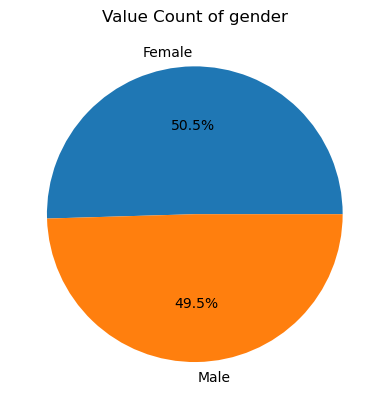

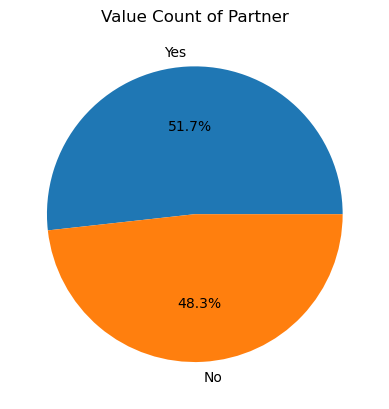

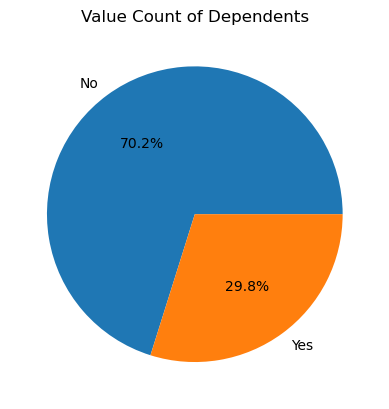

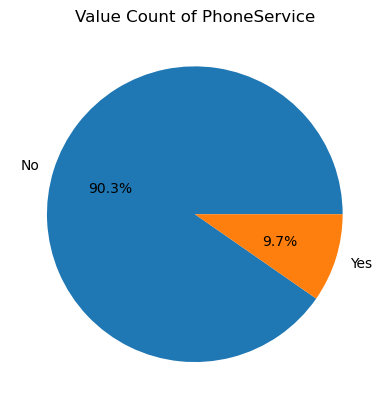

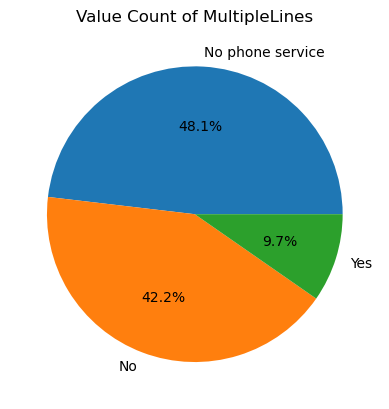

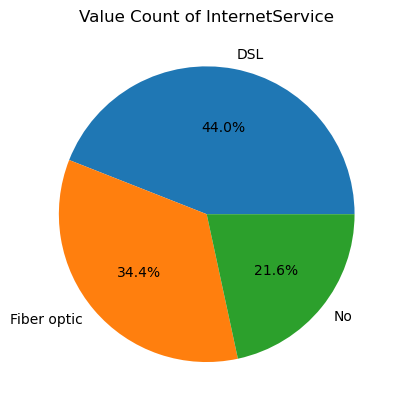

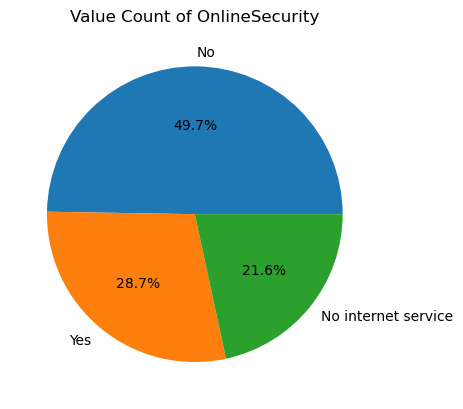

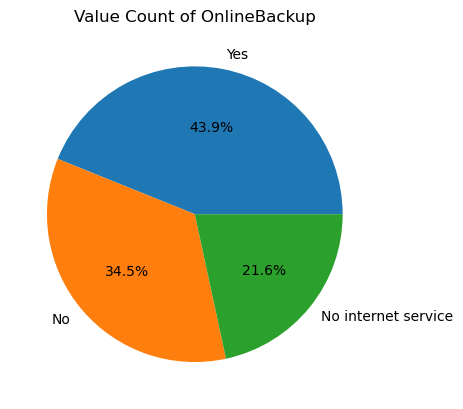

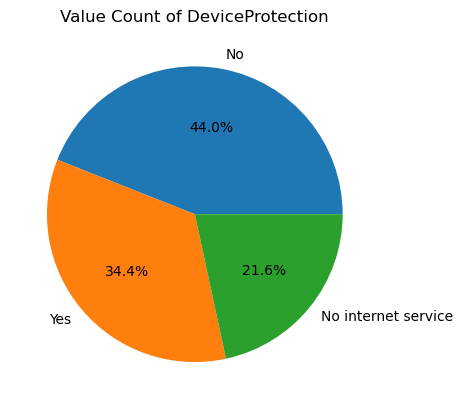

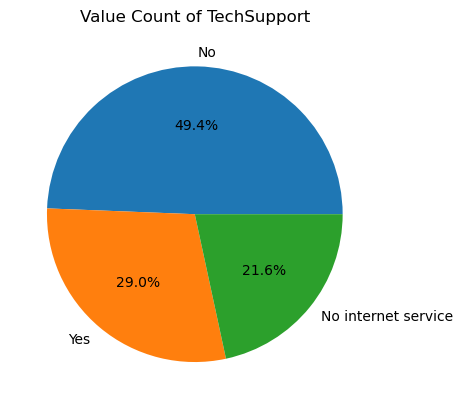

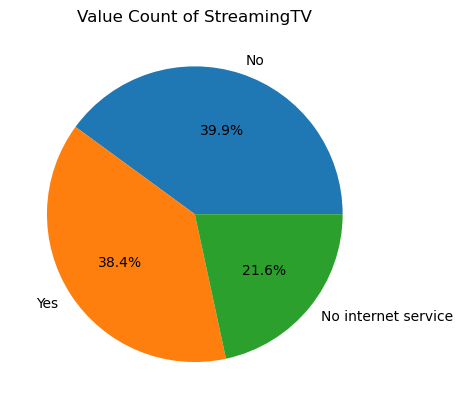

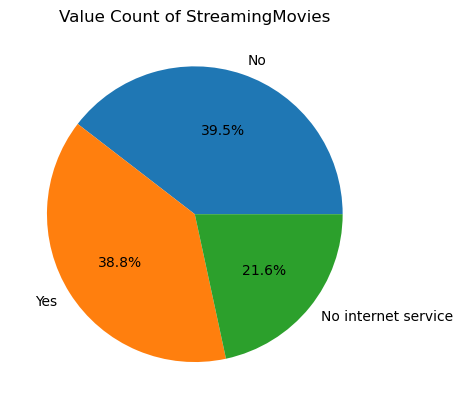

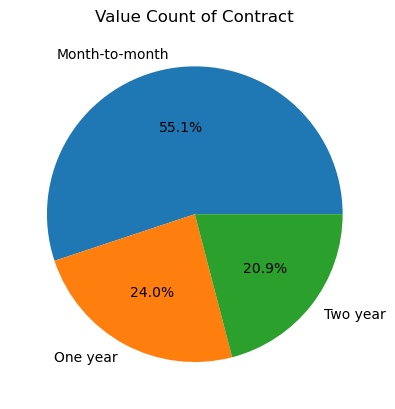

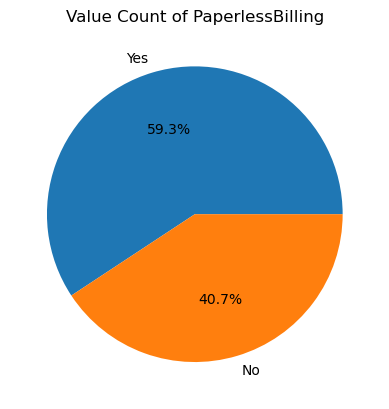

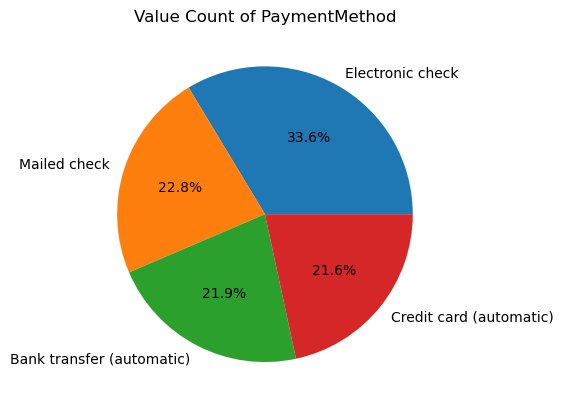

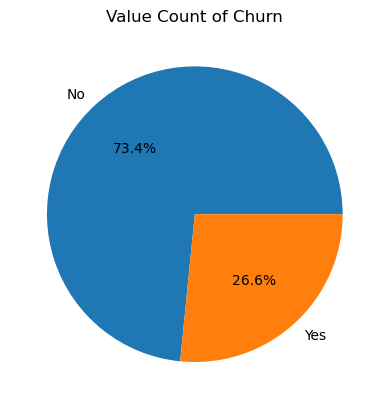

In [20]:
for i,predictor in enumerate(data_teleco.select_dtypes(include="object")):
    plt.figure(i)
    plt.pie(data_teleco[predictor].value_counts(),labels = data_teleco[predictor].unique(),autopct="%1.1f%%")
    plt.title(f"Value Count of {predictor}")
    plt.show()

#### Desciding Encoding Types

In [21]:
# Checking for any sequence is the object columns so we can select encoding techniques.
cols = data_teleco.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(data_teleco[feature].unique())
    print()

Column Name -  gender
['Female' 'Male']

Column Name -  Partner
['Yes' 'No']

Column Name -  Dependents
['No' 'Yes']

Column Name -  PhoneService
['No' 'Yes']

Column Name -  MultipleLines
['No phone service' 'No' 'Yes']

Column Name -  InternetService
['DSL' 'Fiber optic' 'No']

Column Name -  OnlineSecurity
['No' 'Yes' 'No internet service']

Column Name -  OnlineBackup
['Yes' 'No' 'No internet service']

Column Name -  DeviceProtection
['No' 'Yes' 'No internet service']

Column Name -  TechSupport
['No' 'Yes' 'No internet service']

Column Name -  StreamingTV
['No' 'Yes' 'No internet service']

Column Name -  StreamingMovies
['No' 'Yes' 'No internet service']

Column Name -  Contract
['Month-to-month' 'One year' 'Two year']

Column Name -  PaperlessBilling
['Yes' 'No']

Column Name -  PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Column Name -  Churn
['No' 'Yes']



Here we can clearely see there is no any precedence or sequence in the PaymentMethod and InternetService Features so we have to use either get_dummies() or OneHotEncoding Technique.

- Features for OneHotEncoding / Get Dummies - PaymentMethod and InternetService

Here we can clearely see there is precedence or sequence in the gender, PhoneService, Dependents, Partner, Feature, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract and PaperlessBilling so we have to use either replace() or Ordinal Encoding Technique.

- Features for OrdinalEncoding / replace - gender, PhoneService, Dependents, Partner, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract and PaperlessBilling

As there are categorical values in the churn feature i.e Target Feature so we require need of Label Encoding Technique

- Features for LabelEncoding - churn

#### Outliers Detection

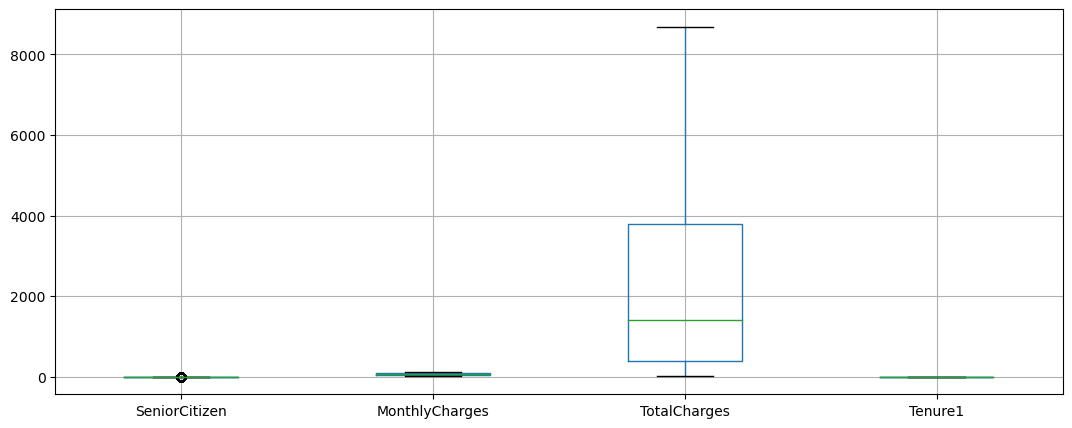

In [22]:
# Checking for Outliers
plt.figure(figsize=(13,5))
data_teleco.boxplot()
plt.show()

Here we can see there are no outliers in the any feature.

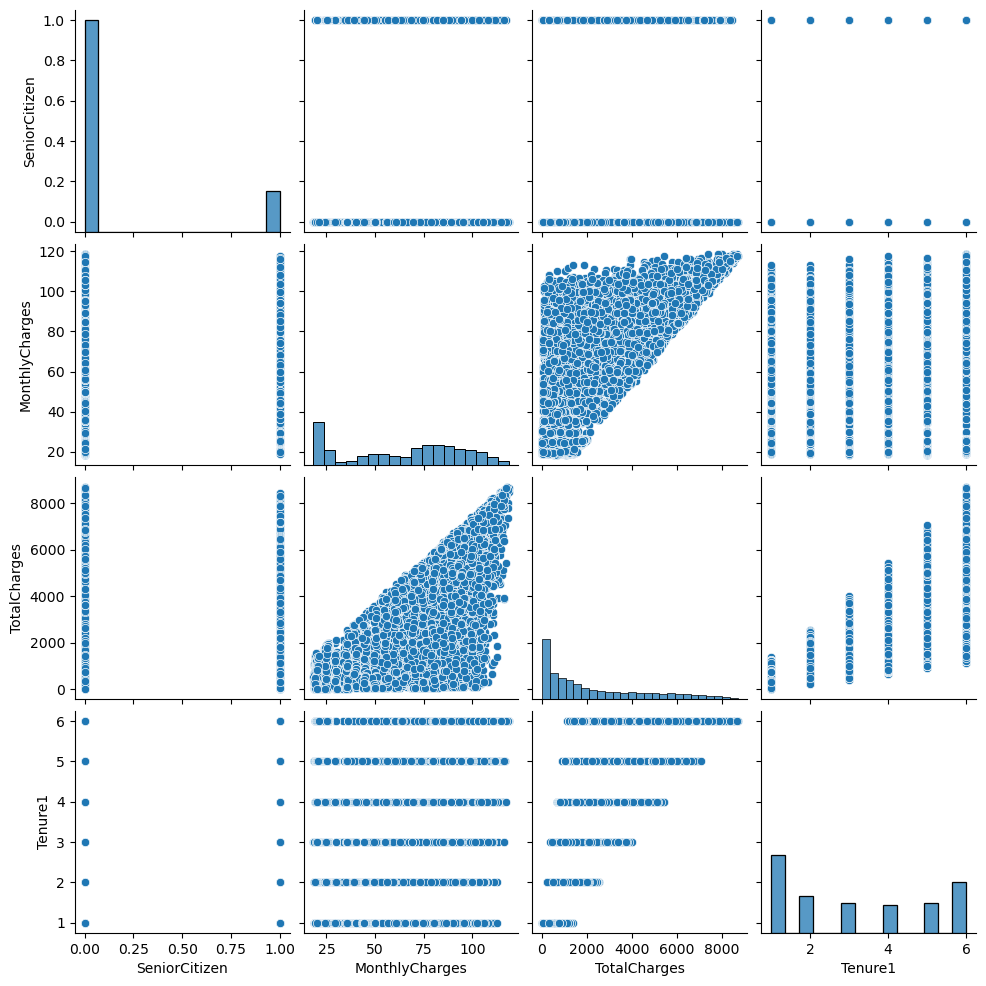

In [23]:
# Pairplot for Distribution
sns.pairplot(data_teleco)
plt.show()

#### Correlation 

In [24]:
data_teleco.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Tenure1
SeniorCitizen,1.000000,0.219874,0.102411,0.016019
MonthlyCharges,0.219874,1.000000,0.651065,0.241889
TotalCharges,0.102411,0.651065,1.000000,0.817140
Tenure1,0.016019,0.241889,0.817140,1.000000


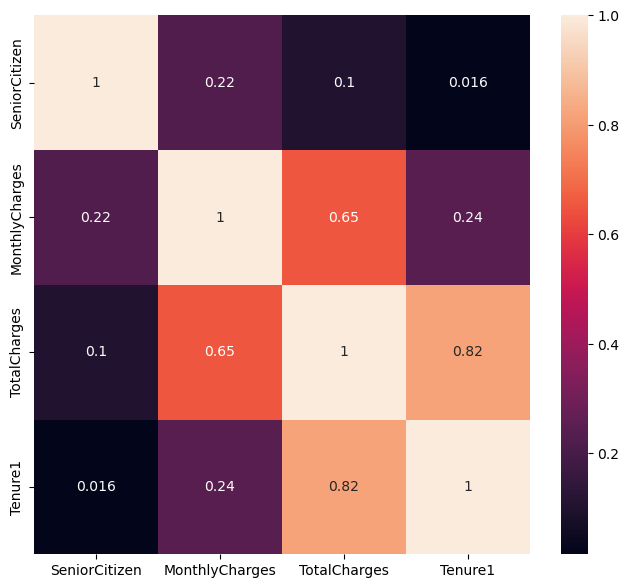

In [25]:
# Heatmap for correlation Values
plt.figure(figsize=(8,7))
sns.heatmap(data_teleco.corr(),annot=True)
plt.show()

Range of Good correlation/Predictors is -0.7 to -1 for negative correlation and 0.7 to 1 for positive correlation. from above table,heatmap and horrizontal Bar graph there is no one feature which is best Describing the target Feature and almost all features having Worst correlation. which is in between -0.3 to 0.3. We can also say that -

Intuitions - 

- TotalCharges is highly positive overall correlated with Tenure1.
- TotalCharges is highly positive overall correlated with MonthlyCharges.

#### VIF (Variance Inflation Factor)

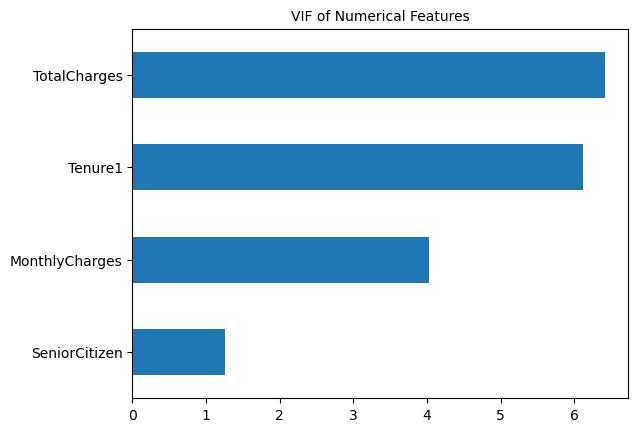

In [26]:
 #Checking for relation between independent features.
x = data_teleco.select_dtypes(exclude="object")
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
x1 = pd.Series(vif_list,index=x.columns)
x1.sort_values().plot(kind="barh")
plt.title("VIF of Numerical Features",fontsize=10)
plt.show()

Variance inflation factors range is 0 to infinity. 0 to 5 vif score it suggests that there is no correlation between other independent features. If VIF sore is more than 5 then we cut off that feature but in this case most of the features are in vif range so we are not removing any feature.

#### Status of Target Feature

First of all We require label encoding beacuse target column is in categorical datatype.

In [27]:
# Checking for Value counts of churn feature
data_teleco["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [28]:
100*data_teleco['Churn'].value_counts()/len(data_teleco['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

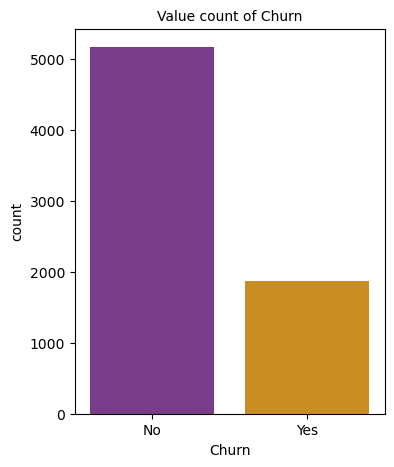

In [29]:
# Countplot of loan Status Feature
plt.figure(figsize=(4,5))
sns.countplot(data_teleco["Churn"], palette='CMRmap')
plt.title("Value count of Churn",fontsize=10)
plt.show()

- Data is highly imbalanced, ratio = 73:27 
- So we analyse the data with other features while taking the target values separately to get some insights.

### Univariate Analysis

#### 1. Plot distibution of individual predictors by churn

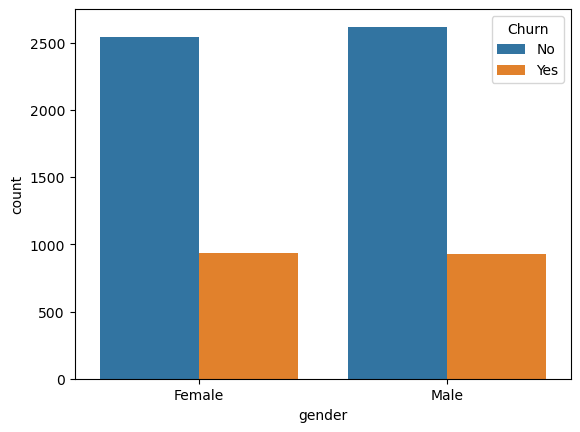

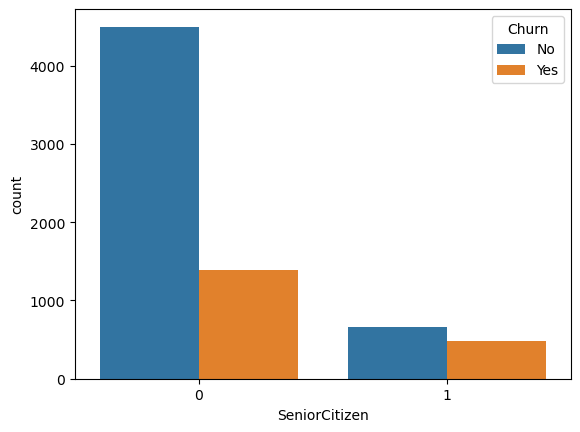

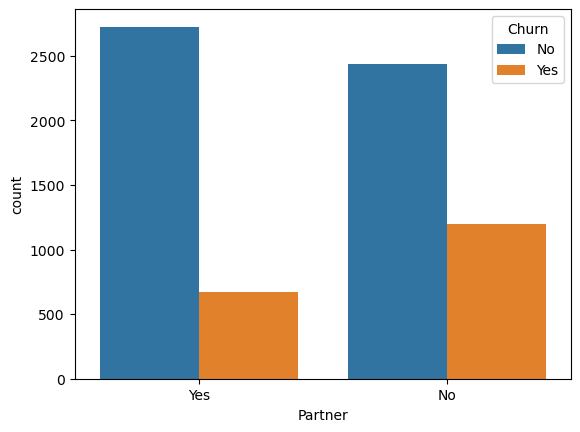

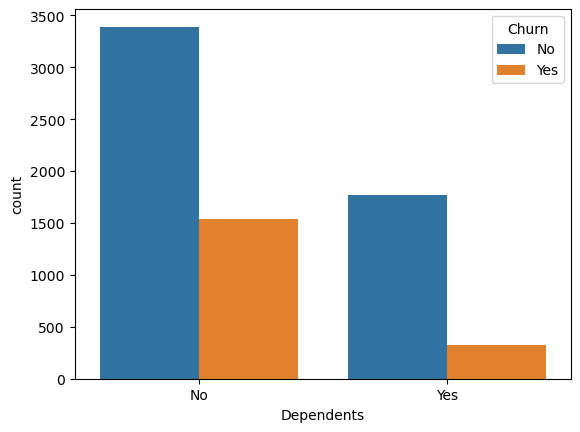

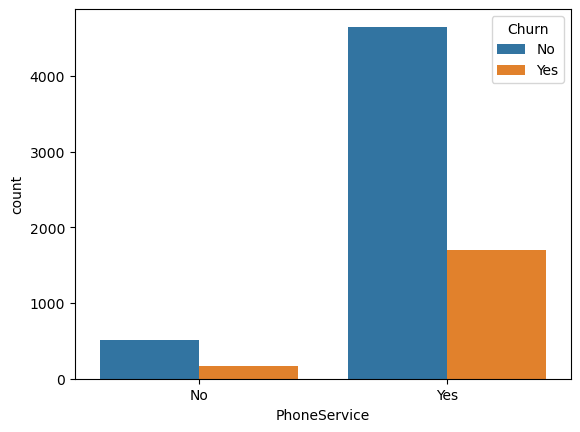

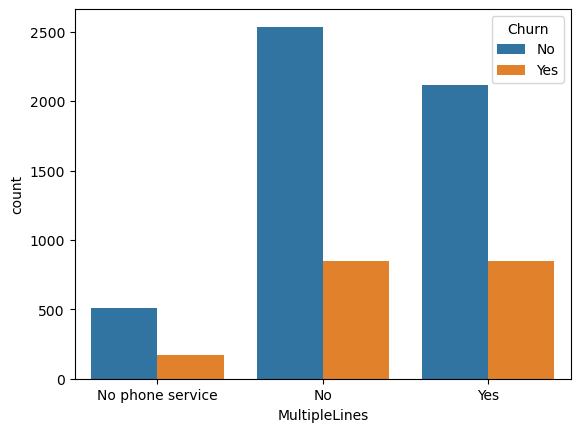

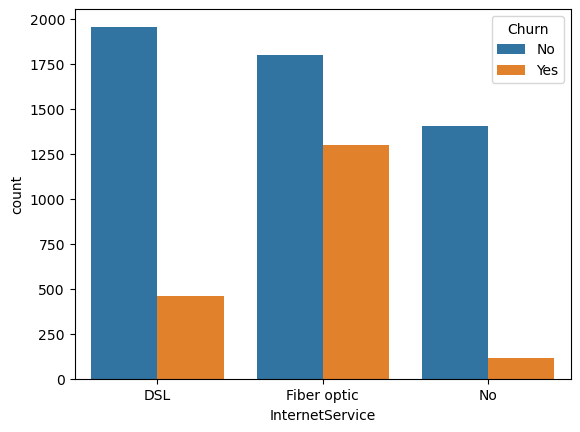

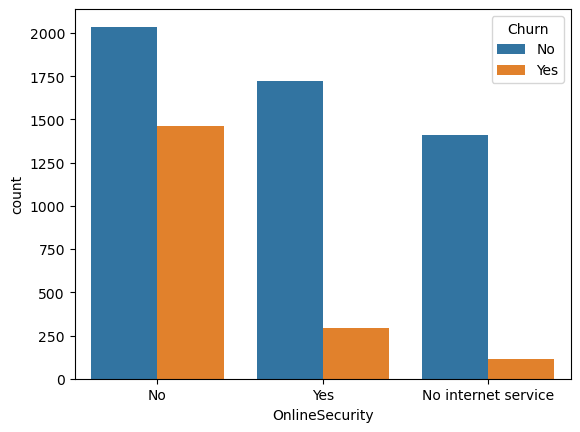

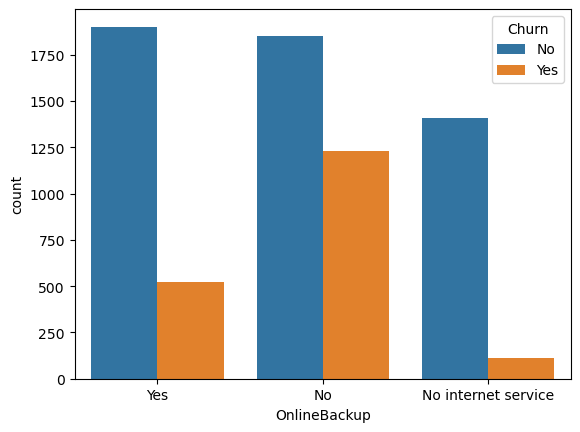

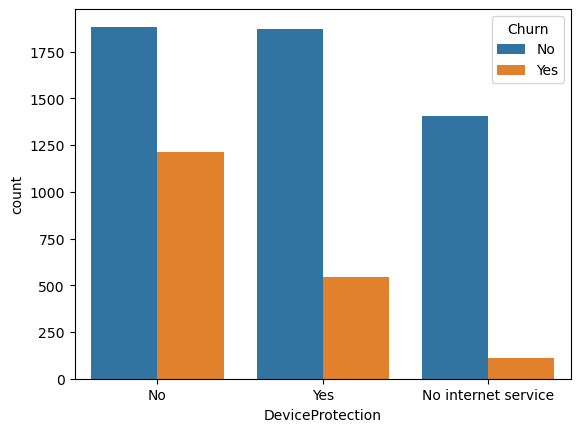

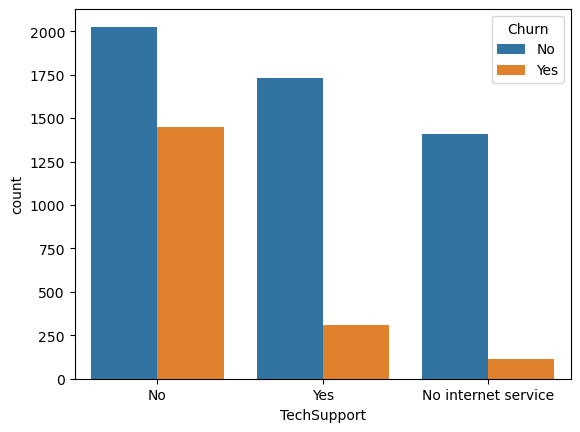

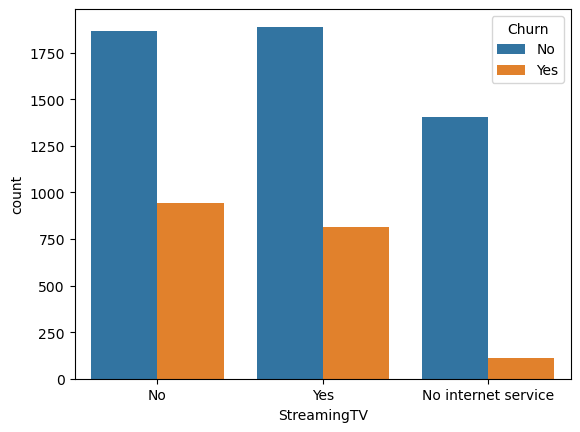

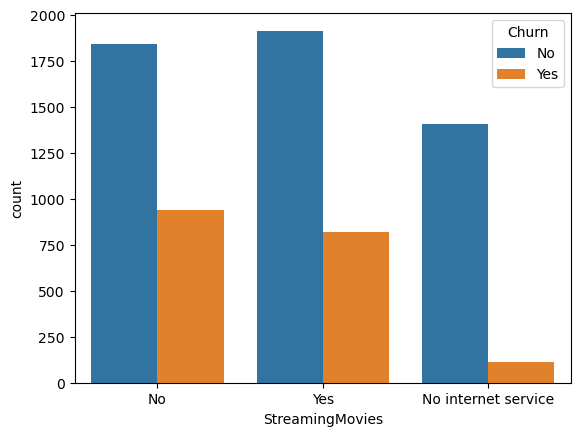

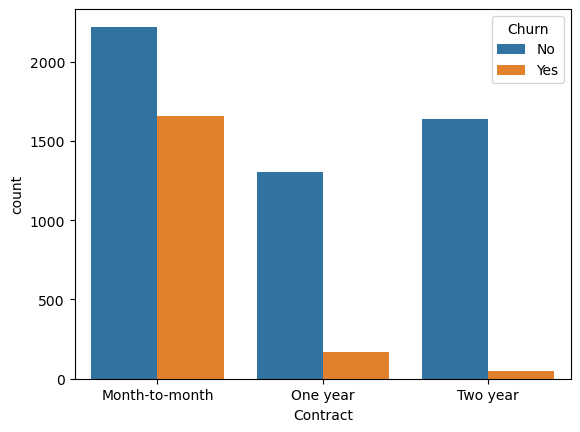

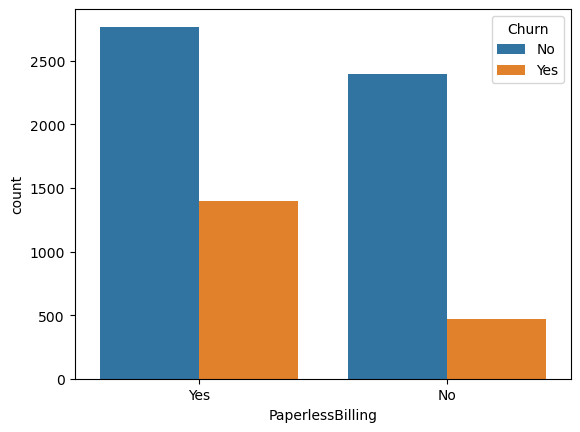

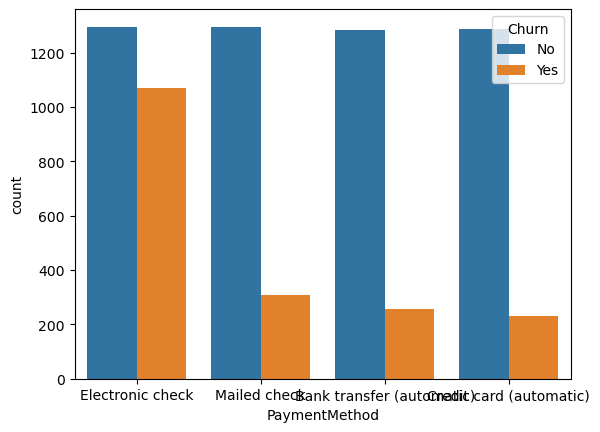

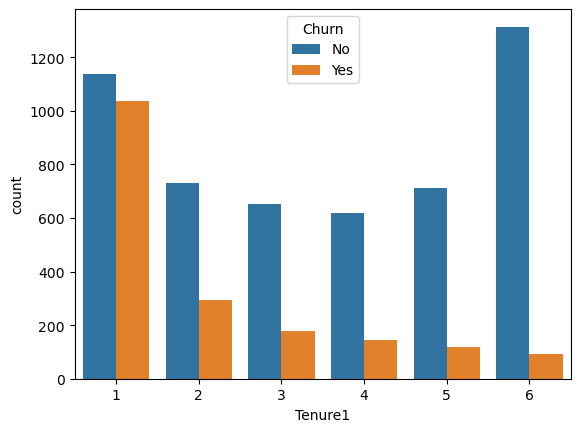

In [30]:
for i, predictor in enumerate(data_teleco.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data_teleco, x=predictor, hue='Churn')

### Feature Engineering -

#### 2. Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [31]:
data_teleco['Churn'] = np.where(data_teleco.Churn == 'Yes',1,0)
data_teleco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure1
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,4
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


#### 3. Convert all the categorical variables into Numerical by using encoding variables

In [32]:
data_teleco.PhoneService.value_counts().to_dict()

{'Yes': 6352, 'No': 680}

In [33]:
# data_teleco["gender"] = data_teleco["gender"].replace({'Male': 1, 'Female': 0})
# data_teleco["PhoneService"] = data_teleco["PhoneService"].replace({'Yes': 1, 'No': 0})
# data_teleco["Dependents"] = data_teleco["Dependents"].replace({'No': 0, 'Yes': 1})
# data_teleco["Partner"] = data_teleco["Partner"].replace({'No': 0, 'Yes': 1})
# data_teleco["MultipleLines"] = data_teleco["MultipleLines"].replace({'No': 0, 'Yes': 1, 'No phone service': 2})
# data_teleco["OnlineSecurity"] = data_teleco["OnlineSecurity"].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
# data_teleco["OnlineBackup"] = data_teleco["OnlineBackup"].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
# data_teleco["DeviceProtection"] = data_teleco["DeviceProtection"].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
# data_teleco["TechSupport"] = data_teleco["TechSupport"].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
# data_teleco["StreamingTV"] = data_teleco["StreamingTV"].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
# data_teleco["StreamingMovies"] = data_teleco["StreamingMovies"].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
# data_teleco["Contract"] = data_teleco["Contract"].replace({'Month-to-month': 0, 'Two year': 2, 'One year': 1})
# data_teleco["PaperlessBilling"] = data_teleco["PaperlessBilling"].replace({'Yes': 1, 'No': 0})

In [34]:
# applying Replace Function for Encoding
data_teleco["gender"] = data_teleco["gender"].replace({'Male': 1, 'Female': 0})
data_teleco["Contract"] = data_teleco["Contract"].replace({'Month-to-month': 0, 'Two year': 2, 'One year': 1})
data_teleco["MultipleLines"] = data_teleco["MultipleLines"].replace({'No': 0, 'Yes': 1, 'No phone service': 2})

for i in ["PhoneService","Dependents","Partner","PaperlessBilling"]:
    data_teleco[i] = data_teleco[i].replace({'No': 0, 'Yes': 1})

lst = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in lst:
    data_teleco[i] = data_teleco[i].replace({'No': 0, 'Yes': 1, 'No internet service': 2})

In [35]:
# applying Get_dummies() for encoding
data_dummies = pd.get_dummies(data_teleco.select_dtypes(include="object"))
data_dummies.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0
4,0,1,0,0,0,1,0


In [36]:
# Joining two data frames after Encoding
df_data_telco = pd.concat([data_teleco,data_dummies],axis=1)
df_data_telco.drop(["PaymentMethod","InternetService"],axis=1,inplace=True)
df_data_telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,Tenure1,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,2,0,1,0,0,...,29.85,0,1,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,...,1889.50,0,3,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,...,108.15,1,1,1,0,0,0,0,0,1
3,1,0,0,0,0,2,1,0,1,1,...,1840.75,0,4,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,151.65,1,1,0,1,0,0,0,1,0


#### Relationship between Monthly Charges and Total Charges

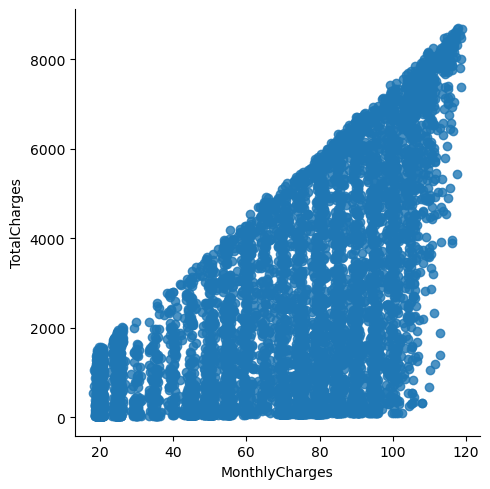

In [37]:
sns.lmplot(data=df_data_telco, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()

Total Charges increase as Monthly Charges increase - as expected.

#### Churn by Monthly Charges and Total Charges

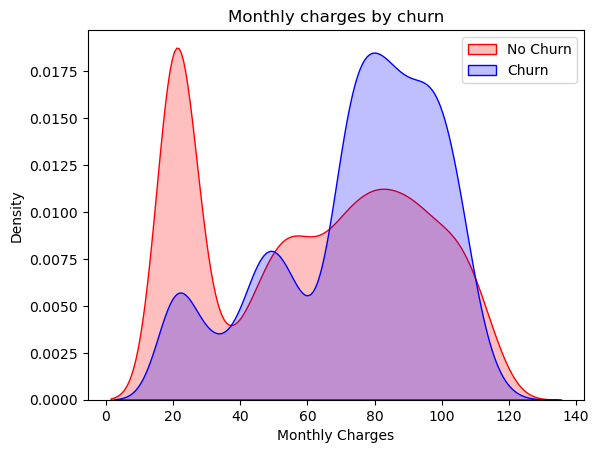

In [38]:
Mth = sns.kdeplot(df_data_telco.MonthlyCharges[(df_data_telco["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_data_telco.MonthlyCharges[(df_data_telco["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

Insight: Churn is high when Monthly Charges are high

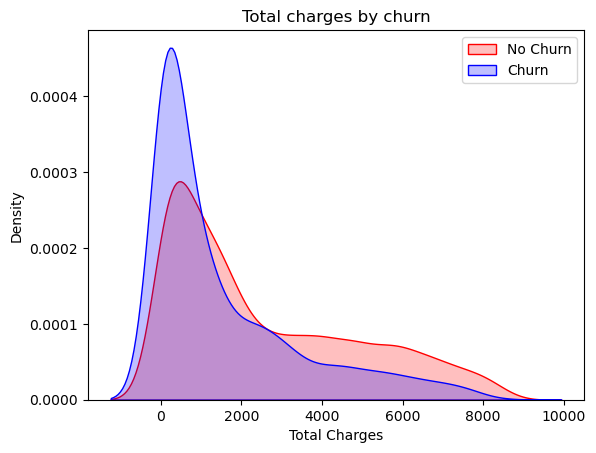

In [39]:
Tot = sns.kdeplot(df_data_telco.TotalCharges[(df_data_telco["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_data_telco.TotalCharges[(df_data_telco["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show()

insight : as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

#### Build a corelation of all predictors with 'Churn'

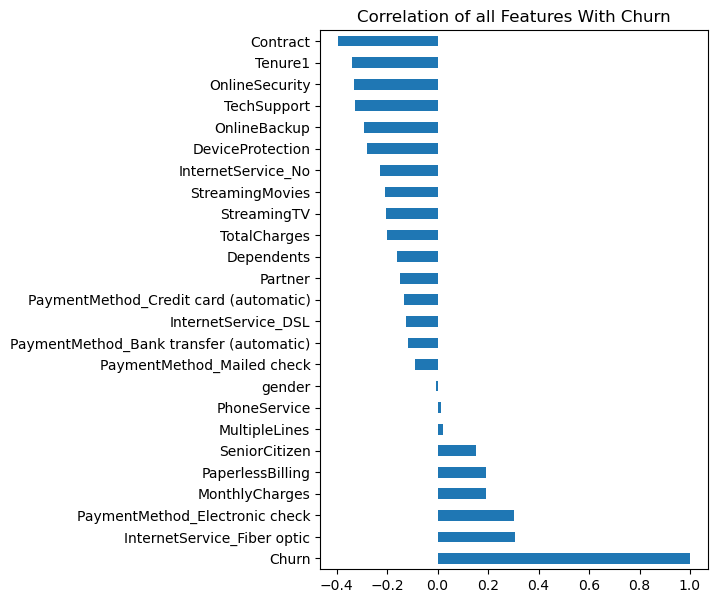

In [40]:
# plot of Correlation of Target feature with independent Feature
plt.figure(figsize=(5,7))
d1 = df_data_telco.corr().loc["Churn"].sort_values(ascending=False)
d1.plot(kind="barh")
plt.title("Correlation of all Features With Churn")
plt.show()

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

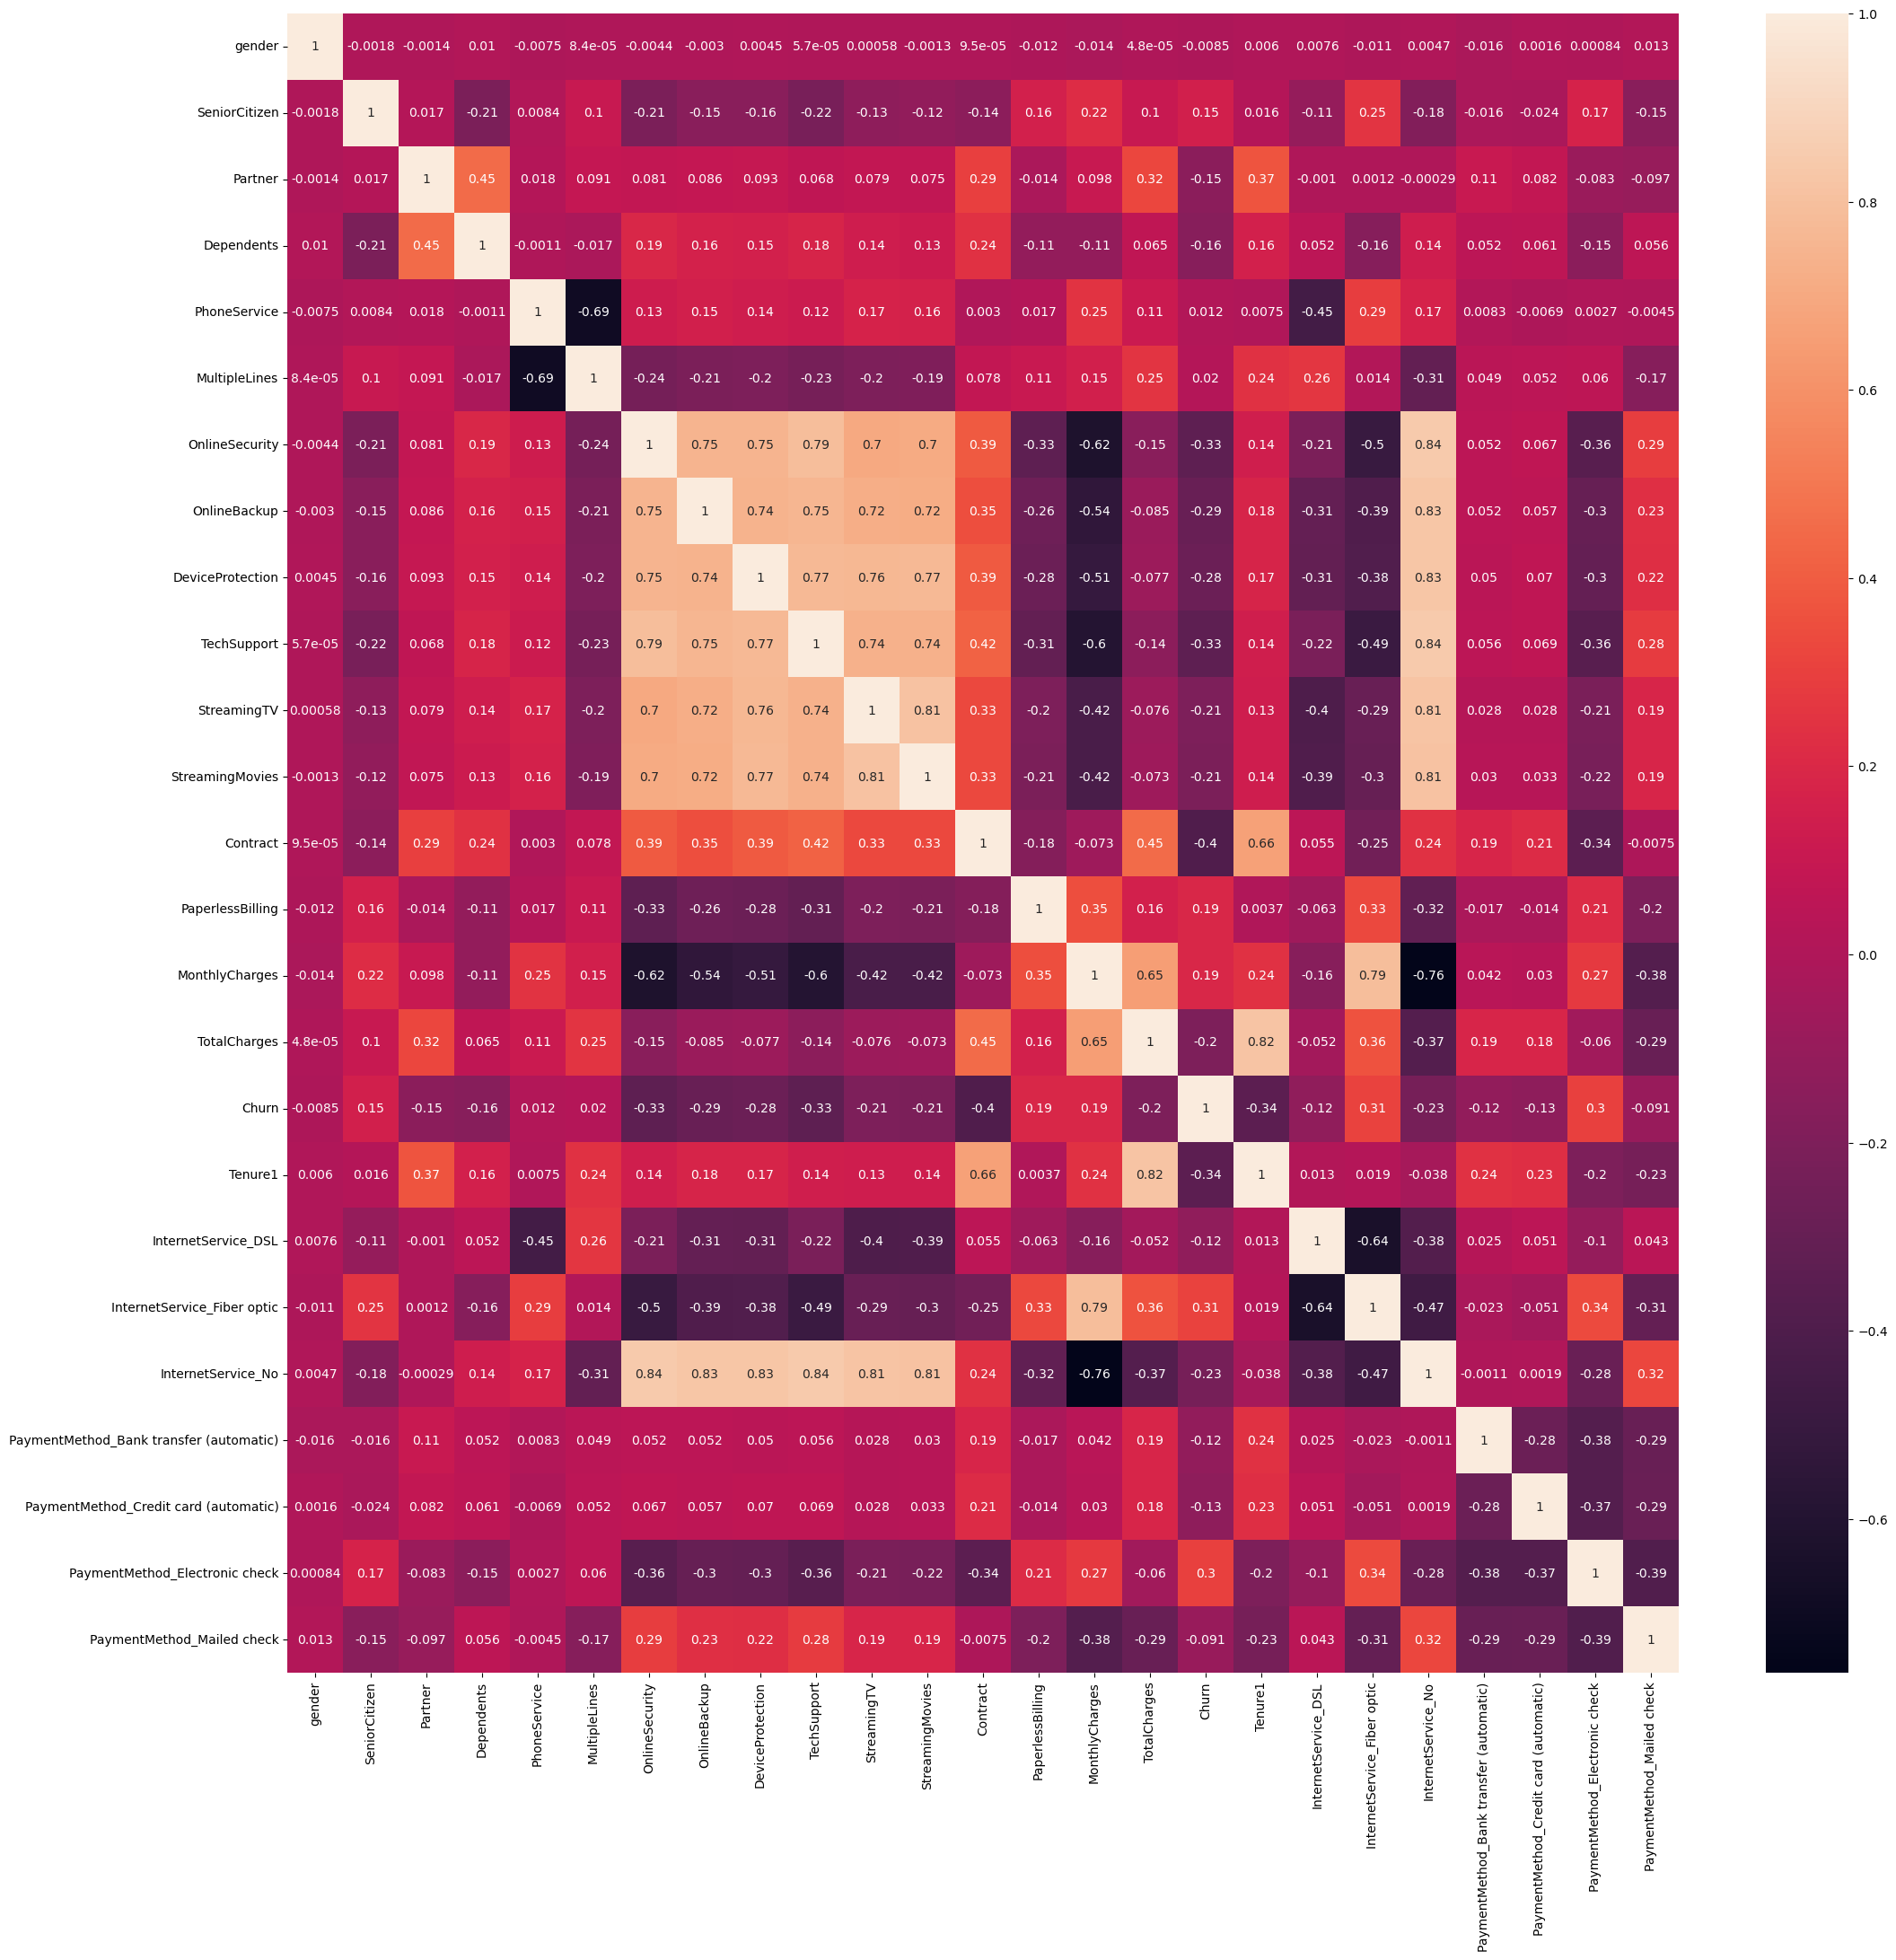

In [41]:
# Heatmap of Correlation
plt.figure(figsize=(25,24))
sns.heatmap(df_data_telco.corr(),annot=True)
plt.show()

### Bivariate Analysis

In [42]:
new_df1_no_churn = data_teleco.loc[data_teleco["Churn"]==0]
new_df1_churn = data_teleco.loc[data_teleco["Churn"]==1]

In [43]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 4*len(temp.unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

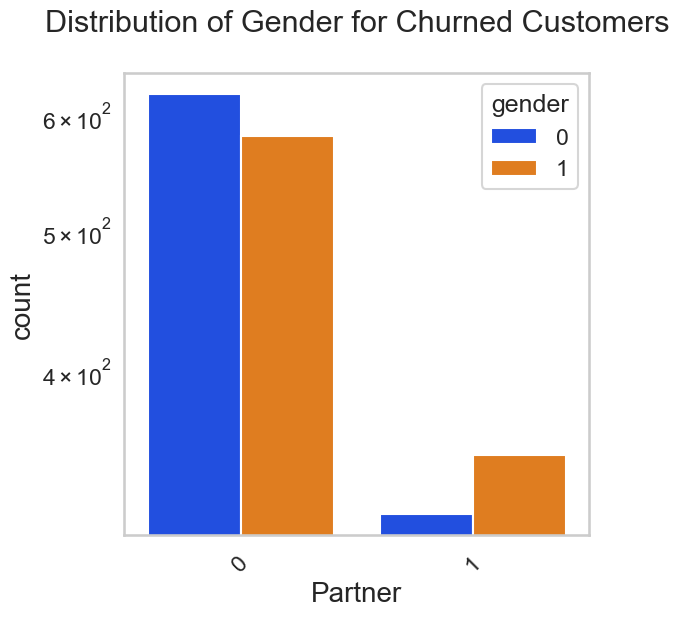

In [44]:
uniplot(new_df1_churn,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

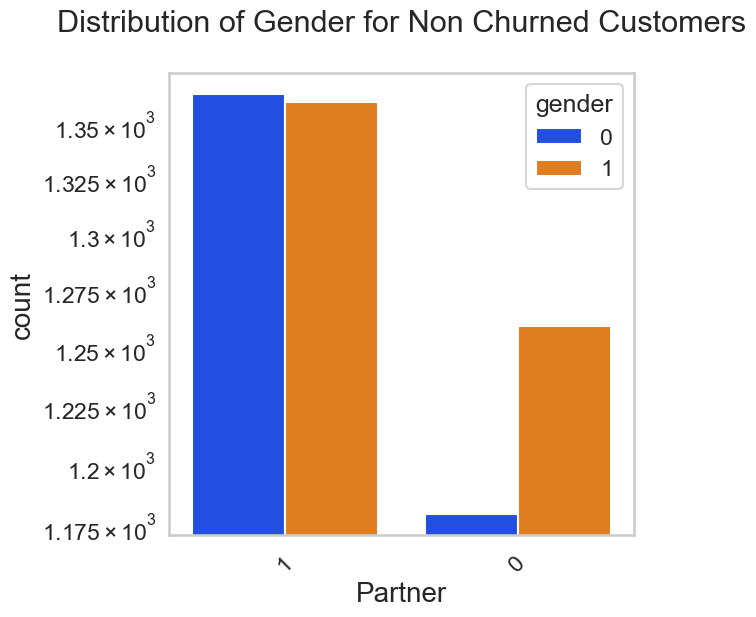

In [45]:
uniplot(new_df1_no_churn,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

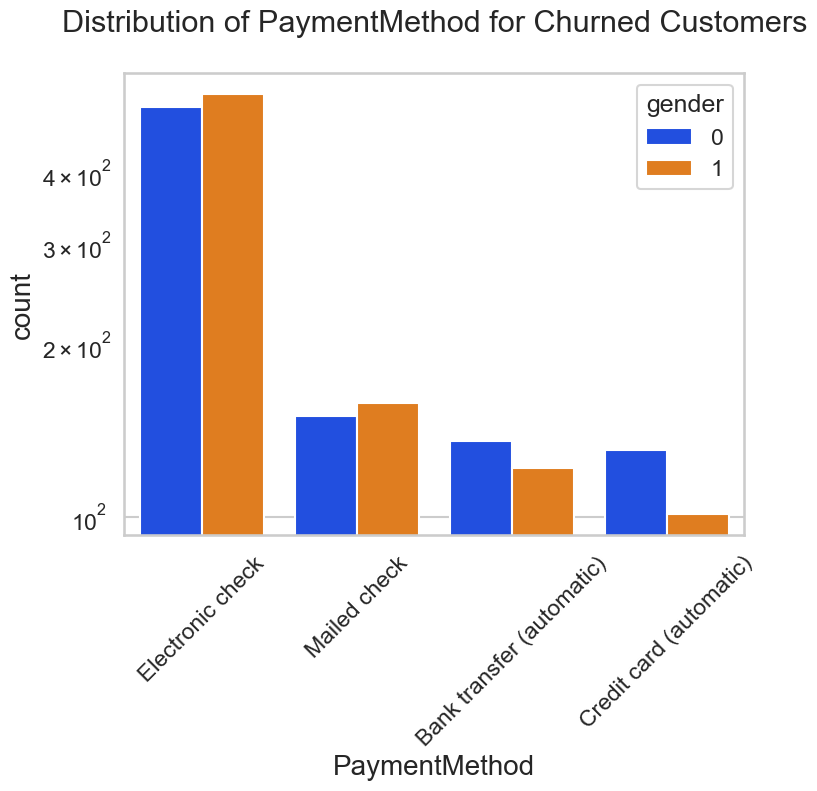

In [46]:
uniplot(new_df1_churn,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

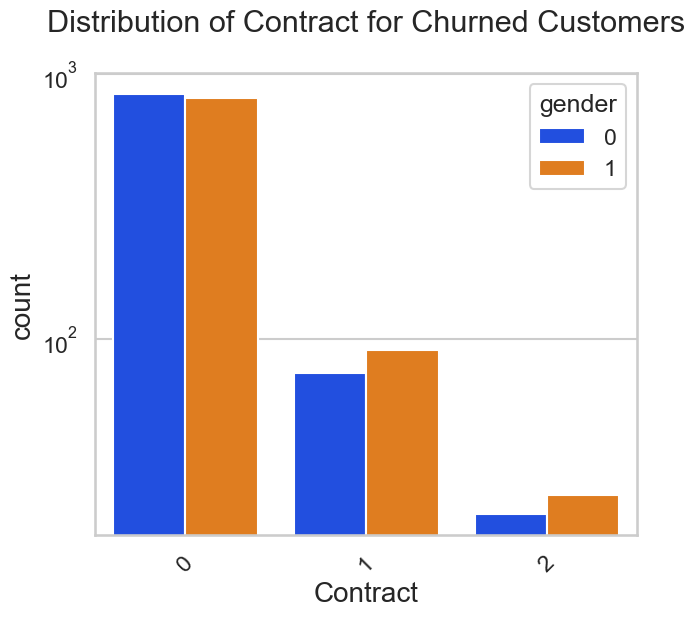

In [47]:
uniplot(new_df1_churn,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

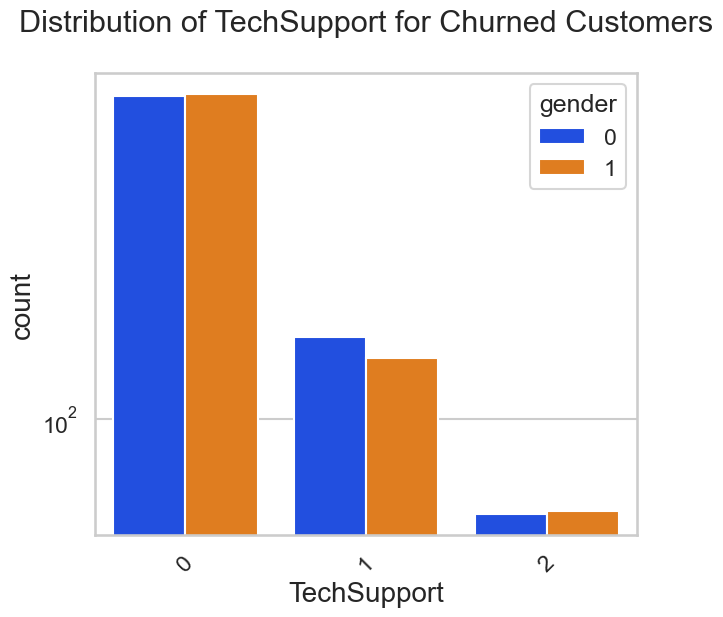

In [48]:
uniplot(new_df1_churn,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

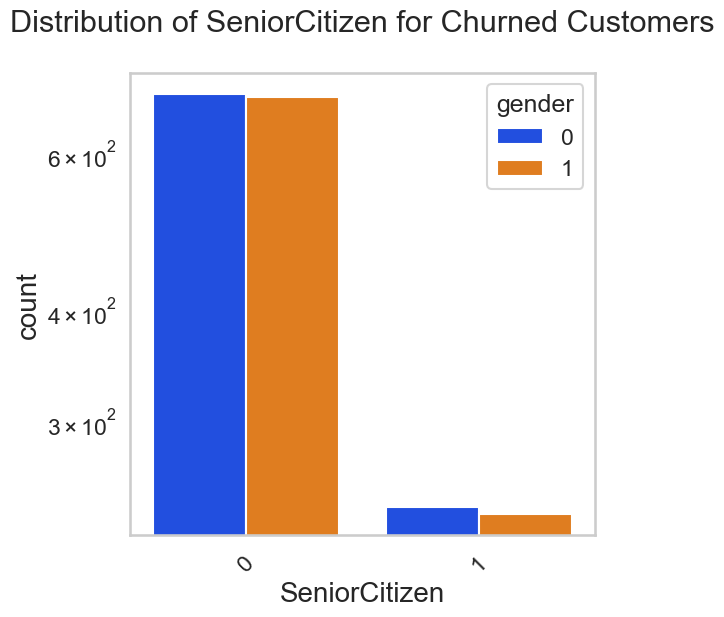

In [49]:
uniplot(new_df1_churn,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Conclusion

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [51]:
# Saving dataframe to csv for Model Building
df_data_telco.to_csv('Tel_churn.csv',index=False)